### IBM HR Analytics Employee Attrition & Performance


***Need for HR Analytics:***


*HR analytics is the systematic identification and quantification of the people drivers of business outcomes (Heuvel & Bondarouk, 2016).*

Analytics is always an important topic and trend in every part of business and HR is also not far behind. 
Human Resources analytics provides an organization with insights for effectively managing employees so that business goals can be reached quickly and efficiently. By accurately predicting attrition risks of current employees, you can take real steps to keep your talent happy, engaged, and less susceptible to competitive overtures. 


<img src="https://d35kskn2b3gqvv.cloudfront.net/wp-content/uploads/2016/10/13.png" />





***Scope***

Through this project we will uncover the factors that may lead to employee attrition and build a predctive machine learning model to identify employees that may leave the company. 

This is a fictional data set created by IBM data scientists and can be found on Kaggle __[here](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/home)__






***Import the necessary Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

***Load the Data Set and let's have a peek at the data***

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

data.head()

#The data consists of levels for a few features. The levels for these features are as follows:

#Education                1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
#EnvironmentSatisfaction  1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#JobInvolvement           1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#JobSatisfaction          1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#PerformanceRating        1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
#RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#WorkLifeBalance          1 'Bad' 2 'Good' 3 'Better' 4 'Best'


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:

# By taking a glance at our dataset, we can observe that there are 34 features and 1 target variable: "Attrition". 
# We can start asking questions relating to employee attrition such as: 
# 1) Is distance from home a factor in employee attrition? 
# 2) Does Marital status play a role in employee attrition? 
# 3) Do Employees get frequent training to cope with the job? 



***Data Exploration*** 

It is a good practice to perform some data exploration to get a better understanding our data set. <br>

Lets perform some data visualizations using the matplotlib and seaborn pakages

In [4]:
# Are there any missing  values? 

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

We do not have any missing values. However, our data has a mix of numeric and categorical features. Therefore, we have to remember to convert our categorical features to numerics while training our predictive machine learning model later.  

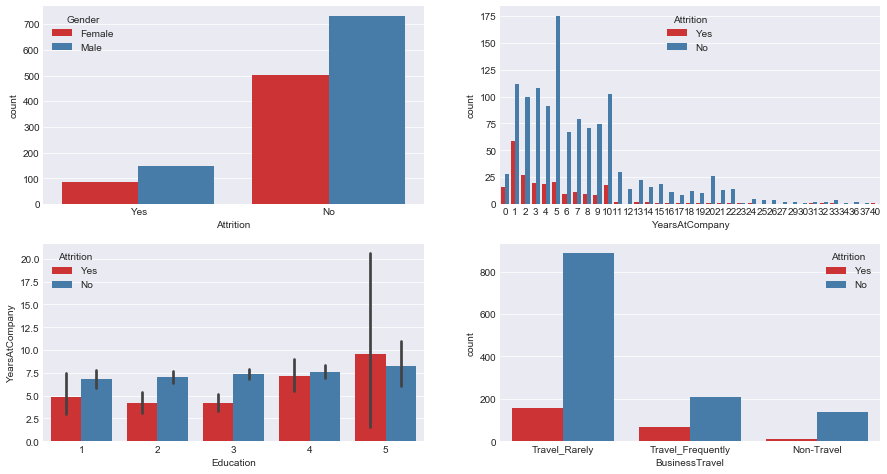

In [5]:
# Lets what are some of the factors are affecting the employees to leave the organization. 

sns.set_style('darkgrid')

f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,8))
sns.countplot(data['Attrition'], hue=data['Gender'], palette='Set1',ax=ax1)
sns.countplot(data['YearsAtCompany'], hue=data['Attrition'], palette='Set1', ax=ax2)
sns.barplot(data['Education'], data['YearsAtCompany'], hue=data['Attrition'],palette='Set1', ax=ax3)
sns.countplot(data['BusinessTravel'], hue=data['Attrition'], palette='Set1', ax=ax4)


# Observations from the plots: 

# Plot 1: Our data set shows us that the number of male employees leaving the organization is higher that the female employees

# Plot 2: The attrition rate is low for the employees spending more than 10 years at the company. 

# Plot 3: Employees with a doctorate degree tend to leave the company more than employees with lower degrees. 

# Plot 4: Employees who travel rarely are leaving the company more than employees who do not travel or travel frequently. 


***Some more exploratory analysis***

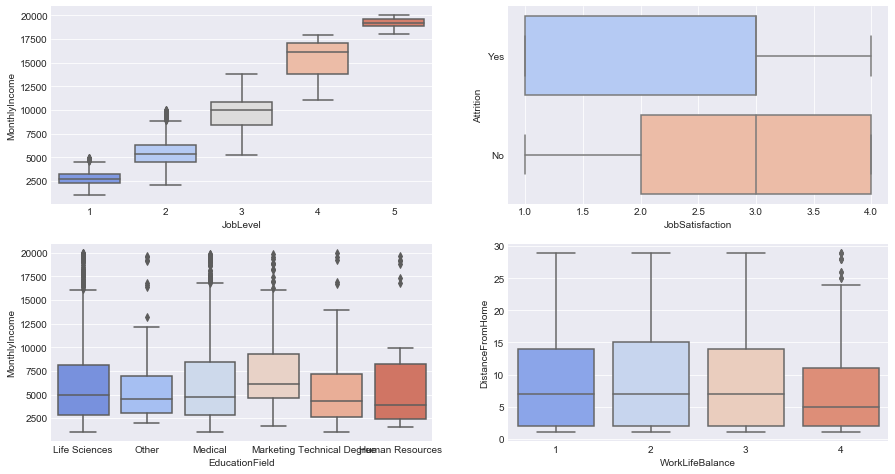

In [6]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,8))
sns.boxplot(data['JobLevel'], data['MonthlyIncome'], palette='coolwarm', ax=ax1)
sns.boxplot(data['JobSatisfaction'], data['Attrition'], palette='coolwarm', ax=ax2)
sns.boxplot(data['EducationField'], data['MonthlyIncome'], palette='coolwarm', ax=ax3)
sns.boxplot(data['WorkLifeBalance'], data['DistanceFromHome'], palette='coolwarm', ax=ax4)


# Observations from the plots: 

# Plot 1: As an employees job level increases his average monthly income also increases. 

# Plot 2: Employees with lower job satisfaction are leaving the company more. 

# Plot 3: The average monthly salary of employees in marketing is higher than other employees. 

# Plot 4: Employees staying closer to the work place have higher rating in work life balance. 


***Predicting Employee Attrition***

Our objective is to predict employee attrition. So, this is a classification problem. 

***Classification***

Classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known. <br>

Classification is 

As our data consists of numerical and categorical data we need to treat them diferently. 
Lets start with finding the correlation between our numerical features. 

In [7]:
numerical_data = data.select_dtypes(exclude='object')
categorical_data = data.select_dtypes(include='object')

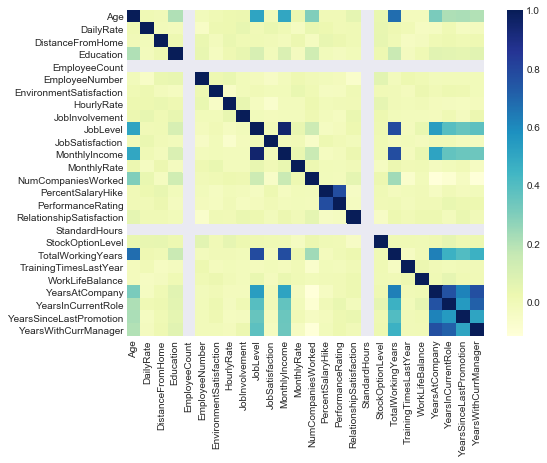

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(numerical_data.corr(), cmap='YlGnBu')

From the above correlation plot we can observe that we have poorly correlated(values towards 0) and strongly correlated (values towards 1) features. 
Our model should be trained on as many poorly correlated features as possible to get a better prediction. We can remove the strongly correlated features from the data so that the model can train better. 

In [9]:
numerical_data = numerical_data.drop(['YearsAtCompany', 'YearsInCurrentRole',
                           'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PercentSalaryHike', 'PerformanceRating'], axis=1)

Lets turn our attention to the categorical variables. As our machine learning model needs numerical data as an input, we need to convert our categorical features into numerical ones. 

In [10]:
# Attrition consists of 'Yes' and 'No'. Lets change that to 1 and 0. 
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
categorical_data['Attrition'] = categorical_data["Attrition"].apply(lambda x: target_map[x])


In [11]:
# Now lets convert the rest of the categorical features using pandas get_dummies to not fall into the dummy variable trap. 
categorical_data = pd.get_dummies(categorical_data)

In [12]:
# Now we combine our numerical and categorical data to create a final data frame to train our model upon. 

final_data = pd.concat([numerical_data, categorical_data], axis=1)

In [13]:
final_data.head(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0


***Feature Selection and Engineering***




We can remove some of the below features from our data as they do not provide any predictive value for our model. <br>

EmployeeCount = Variable that just counts employees, No predictive Value<br>
EmployeeNumber = Unique ID for employee, No Predictive Value <br>
StandardHours = All were 80, No Predictive Value




In [14]:
final_data = final_data.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1)

***Model building***

We will try a few classification techniques as well as an artificial neural network. 

In [15]:
# Import of necessary modules

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

z:\ms\anaconda\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [68]:
# Split the data into training data and testing data

x = final_data.drop('Attrition', axis=1) # Features
y = final_data['Attrition'] # Target variable

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)



In [69]:
# Lets call our classifiers

rf_model = RandomForestClassifier()
log_model = LogisticRegression()
dec_model = DecisionTreeClassifier()
svc_model = SVC()


In [70]:
models = ['Random Forest Classifier', 'Logistic Regression Classifier', 'Decision Tree Classifier', 'Support Vector Classifier']
classifiers = [rf_model, log_model, dec_model, svc_model]
model_acc = []

In [71]:
# Lets build our models on our training data

for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    acc = accuracy_score(y_test, pred)
    model_acc.append(acc)

    
for i,j in zip(models, model_acc):
    print('Accuracy of {} : {}'.format(i,j))

Accuracy of Random Forest Classifier : 0.8775510204081632
Accuracy of Logistic Regression Classifier : 0.8707482993197279
Accuracy of Decision Tree Classifier : 0.8095238095238095
Accuracy of Support Vector Classifier : 0.8616780045351474


***Cross Validation***

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it. In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. The goal of cross-validation is to estimate the expected level of fit of a model to a data set that is independent of the data that were used to train the model.

In [72]:
from sklearn.cross_validation import cross_val_score

In [73]:
for i,j in zip(models, classifiers):
    a = cross_val_score(estimator = j, X=x_train, y=y_train, cv=10)
    print('{} : {}'.format(i, a.mean()))

Random Forest Classifier : 0.8571407913426761
Logistic Regression Classifier : 0.8659639546632695
Decision Tree Classifier : 0.7764398365769011
Support Vector Classifier : 0.8289830719442369


In [74]:
# Let us try to perform some parameter tuning and see if we can better the accuracy of our best performing classifier

from sklearn.model_selection import GridSearchCV

In [75]:
penalty = ['l1', 'l2']

C = [0.1,1,10,100,1000]

params = {'C':C, 'penalty':penalty}

In [76]:
grid_clf = GridSearchCV(estimator=log_model, param_grid=params, scoring='accuracy', cv=10)


In [77]:
grid_clf.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [78]:
print('Best parameters : ',grid_clf.best_params_)
print('Best Score: ',grid_clf.best_score_)

Best parameters :  {'C': 10, 'penalty': 'l2'}
Best Score:  0.8736637512147716


In [79]:
p = grid_clf.predict(x_test)

In [80]:
print(confusion_matrix(y_test, p))

[[365  15]
 [ 49  12]]


In [81]:
print(accuracy_score(y_test, p))

0.854875283446712


Looks like our Logistic Regression classifier is performing consistently on unseen data as well. We are consistently getting accuracy around 87% for our logistic regression model. 

***Artificial Neural Network using Keras***

Lets us try to implement a Artificial neural network using keras and see if our accuracy scores can increase. 

We will be using Keras, a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Keras is a well-designed API that allows you use to build deep learning models by clipping together high-level building blocks.

In [89]:
# Our data needs to be normalized in order to input it to our neural network. 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [90]:
final_data.shape

(1470, 44)

In [84]:
#final_data = final_data.drop(['Gender_Female', 'MaritalStatus_Divorced'], axis=1)

In [91]:
# We will build our neural network consisting of 2 hidden layers of 22 neurons each. 

# Building the ANN
from keras.wrappers.scikit_learn import KerasClassifier
#from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(units = 22, kernel_initializer = 'normal', activation = 'linear', input_dim = 43))
classifier.add(Dropout(p = 0.1))
classifier.add(Dense(units = 22, kernel_initializer = 'normal', activation = 'relu'))
classifier.add(Dropout(p = 0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
1029/1029 [==============================] - 3s 3ms/step - loss: 0.6110 - acc: 0.8124
Epoch 2/100
1029/1029 [==============================] - 1s 622us/step - loss: 0.3909 - acc: 0.8358
Epoch 3/100
1029/1029 [==============================] - 1s 592us/step - loss: 0.3529 - acc: 0.8610
Epoch 4/100
1029/1029 [==============================] - 1s 625us/step - loss: 0.3390 - acc: 0.8698
Epoch 5/100
1029/1029 [==============================] - 1s 608us/step - loss: 0.3207 - acc: 0.8756
Epoch 6/100
1029/1029 [==============================] - 1s 545us/step - loss: 0.3224 - acc: 0.8776
Epoch 7/100
1029/1029 [==============================] - 1s 606us/step - loss: 0.3093 - acc: 0.8873
Epoch 8/100
1029/1029 [==============================] - 1s 592us/step - loss: 0.3118 - acc: 0.8766
Epoch 9/100
1029/1029 [==============================] - 1s 614us/step - loss: 0.3015 - acc: 0.8892
Epoch 10/100
1029/1029 [==============================] - 1s 592us/step - loss: 0.3041 - acc: 0.8834
E

1029/1029 [==============================] - 0s 313us/step - loss: 0.2255 - acc: 0.9057
Epoch 82/100
1029/1029 [==============================] - 0s 319us/step - loss: 0.2282 - acc: 0.9067
Epoch 83/100
1029/1029 [==============================] - 0s 334us/step - loss: 0.2274 - acc: 0.9077
Epoch 84/100
1029/1029 [==============================] - 0s 327us/step - loss: 0.2221 - acc: 0.9125
Epoch 85/100
1029/1029 [==============================] - 0s 318us/step - loss: 0.2177 - acc: 0.9028
Epoch 86/100
1029/1029 [==============================] - 0s 328us/step - loss: 0.2213 - acc: 0.9048
Epoch 87/100
1029/1029 [==============================] - 0s 317us/step - loss: 0.2149 - acc: 0.9086
Epoch 88/100
1029/1029 [==============================] - 0s 333us/step - loss: 0.2179 - acc: 0.9096
Epoch 89/100
1029/1029 [==============================] - 0s 343us/step - loss: 0.2234 - acc: 0.9057
Epoch 90/100
1029/1029 [==============================] - 0s 327us/step - loss: 0.2155 - acc: 0.9116
Epo

In [92]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [93]:
print(confusion_matrix(y_test, y_pred))

[[363  17]
 [ 39  22]]


In [94]:
print(accuracy_score(y_test,y_pred))

0.873015873015873
